# Riyadh House Predication:


# Libraries Imports 


In [2]:
# Data Analysis Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']

## Necessary imports for Regression
from bs4 import BeautifulSoup
import requests
import time,os
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Load Data

In [29]:
# load data
df = pd.read_csv("Aqar11.csv") 

# Take a look at the first few rows
df.head() 

,Unnamed: 0,location,price,size,bath,bed,search,page,link
0,0,حي الدار البيضاء - الرياض,"750,000 ريال",240 م²,5,7,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1,1,حي عكاظ - الرياض,"1,100,000 ريال",330 م²,4,5,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
2,2,حي الدار البيضاء - الرياض,"880,000 ريال",230 م²,5,5,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
3,3,حي قرطبة - الرياض,"3,700,000 ريال",428 م²,5,6,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
4,4,حي الياسمين - الرياض,"7,900,000 ريال",870 م²,5,7,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...


In [30]:
 # Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1575 non-null   int64 
 1   location    1575 non-null   object
 2   price       1575 non-null   object
 3   size        1575 non-null   object
 4   bath        1575 non-null   int64 
 5   bed         1575 non-null   int64 
 6   search      1575 non-null   int64 
 7   page        1575 non-null   int64 
 8   link        1575 non-null   object
dtypes: int64(5), object(4)
memory usage: 110.9+ KB


In [31]:
# describe Statistical Data
df.describe()

,Unnamed: 0,bath,bed,search,page
count,1575.000000,1575.000000,1575.000000,1575.0,1575.000000
mean,10.000000,4.631746,4.909841,0.0,38.000000
std,6.057224,0.736769,1.161976,0.0,21.655586
min,0.000000,1.000000,1.000000,0.0,1.000000
25%,5.000000,5.000000,4.000000,0.0,19.000000
50%,10.000000,5.000000,5.000000,0.0,38.000000
75%,15.000000,5.000000,5.000000,0.0,57.000000
max,20.000000,5.000000,7.000000,0.0,75.000000


In [32]:
# How many rows and columns does the dataset have?
df.shape 

(1575, 9)

In [33]:
#look at the column names
df.columns 

Index(['Unnamed: 0', 'location', 'price', 'size', 'bath', 'bed', 'search',
       'page', 'link'],
      dtype='object')

In [34]:
#The map function is applied to Series objects???
df.columns = df.columns.map(str.strip) 
df.columns

Index(['Unnamed: 0', 'location', 'price', 'size', 'bath', 'bed', 'search',
       'page', 'link'],
      dtype='object')

In [35]:
#value counts
df["location"].value_counts()

   حي طويق - الرياض             294
   حي الرمال - الرياض           177
   حي الدار البيضاء - الرياض    126
   حي بدر - الرياض               78
   حي عكاظ - الرياض              75
                               ... 
   حي النزهة - الرياض             1
   حي عريض - الرياض               1
   حي غرناطة - الرياض             1
   حي المؤتمرات - الرياض          1
   حي السليمانية - الرياض         1
Name: location, Length: 94, dtype: int64

# Data Formating and cleaning

In [36]:
#Convert Column name to Upper case
df.columns=df.columns.str.upper()
df

,UNNAMED: 0,LOCATION,PRICE,SIZE,BATH,BED,SEARCH,PAGE,LINK
0,0,حي الدار البيضاء - الرياض,"750,000 ريال",240 م²,5,7,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1,1,حي عكاظ - الرياض,"1,100,000 ريال",330 م²,4,5,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
2,2,حي الدار البيضاء - الرياض,"880,000 ريال",230 م²,5,5,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
3,3,حي قرطبة - الرياض,"3,700,000 ريال",428 م²,5,6,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
4,4,حي الياسمين - الرياض,"7,900,000 ريال",870 م²,5,7,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
...,...,...,...,...,...,...,...,...,...
1570,16,حي حطين - الرياض,"3,700,000 ريال",375 م²,5,5,0,75,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1571,17,حي الحزم - الرياض,"1,400,000 ريال",456 م²,5,7,0,75,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1572,18,حي المروج - الرياض,"8,000,000 ريال",1144 م²,5,5,0,75,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1573,19,حي بدر - الرياض,"1,300,000 ريال",360 م²,5,1,0,75,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...


In [37]:
#we can see there are no null values
df.isna()

,UNNAMED: 0,LOCATION,PRICE,SIZE,BATH,BED,SEARCH,PAGE,LINK
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1570,False,False,False,False,False,False,False,False,False
1571,False,False,False,False,False,False,False,False,False
1572,False,False,False,False,False,False,False,False,False
1573,False,False,False,False,False,False,False,False,False


In [38]:
#Remove word "الرياض" from Colums
df["LOCATION"]=df["LOCATION"].str.replace("-","").str.replace("الرياض","")
df.head()

,UNNAMED: 0,LOCATION,PRICE,SIZE,BATH,BED,SEARCH,PAGE,LINK
0,0,حي الدار البيضاء,"750,000 ريال",240 م²,5,7,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1,1,حي عكاظ,"1,100,000 ريال",330 م²,4,5,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
2,2,حي الدار البيضاء,"880,000 ريال",230 م²,5,5,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
3,3,حي قرطبة,"3,700,000 ريال",428 م²,5,6,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
4,4,حي الياسمين,"7,900,000 ريال",870 م²,5,7,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...


In [39]:
#Remove word "ريال" from Colums
df["PRICE"]=df["PRICE"].str.replace(",","").str.replace("ريال","")
df.head()

,UNNAMED: 0,LOCATION,PRICE,SIZE,BATH,BED,SEARCH,PAGE,LINK
0,0,حي الدار البيضاء,750000,240 م²,5,7,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1,1,حي عكاظ,1100000,330 م²,4,5,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
2,2,حي الدار البيضاء,880000,230 م²,5,5,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
3,3,حي قرطبة,3700000,428 م²,5,6,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
4,4,حي الياسمين,7900000,870 م²,5,7,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...


In [40]:
#convert data type from string to Integer
df['PRICE'] = pd.to_numeric(df.PRICE.str.strip())
df['SIZE'] = pd.to_numeric(df.SIZE.str.split().str[0])
df

,UNNAMED: 0,LOCATION,PRICE,SIZE,BATH,BED,SEARCH,PAGE,LINK
0,0,حي الدار البيضاء,750000,240,5,7,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1,1,حي عكاظ,1100000,330,4,5,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
2,2,حي الدار البيضاء,880000,230,5,5,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
3,3,حي قرطبة,3700000,428,5,6,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
4,4,حي الياسمين,7900000,870,5,7,0,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
...,...,...,...,...,...,...,...,...,...
1570,16,حي حطين,3700000,375,5,5,0,75,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1571,17,حي الحزم,1400000,456,5,7,0,75,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1572,18,حي المروج,8000000,1144,5,5,0,75,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1573,19,حي بدر,1300000,360,5,1,0,75,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...


In [41]:
#convert data type from string to Integer
#df['LOCATION'] = pd.to_numeric(df.LOCATION.str.strip())
#df

In [42]:
#Remove word "م" from Colums
#df["SIZE"]=df["SIZE"].str.replace("م","")#.str.replace("","")
#df.head()

In [43]:
df['PRICE'].max() #display higher price

55000000

In [44]:
df['PRICE'].min() #display lower price

73000

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UNNAMED: 0  1575 non-null   int64 
 1   LOCATION    1575 non-null   object
 2   PRICE       1575 non-null   int64 
 3   SIZE        1575 non-null   int64 
 4   BATH        1575 non-null   int64 
 5   BED         1575 non-null   int64 
 6   SEARCH      1575 non-null   int64 
 7   PAGE        1575 non-null   int64 
 8   LINK        1575 non-null   object
dtypes: int64(7), object(2)
memory usage: 110.9+ KB


In [46]:
#drop columns
df.drop('UNNAMED: 0',axis=1,inplace=True)
df.drop('SEARCH',axis=1,inplace=True)
df.drop('PAGE',axis=1,inplace=True)
df

,LOCATION,PRICE,SIZE,BATH,BED,LINK
0,حي الدار البيضاء,750000,240,5,7,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1,حي عكاظ,1100000,330,4,5,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
2,حي الدار البيضاء,880000,230,5,5,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
3,حي قرطبة,3700000,428,5,6,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
4,حي الياسمين,7900000,870,5,7,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
...,...,...,...,...,...,...
1570,حي حطين,3700000,375,5,5,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1571,حي الحزم,1400000,456,5,7,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1572,حي المروج,8000000,1144,5,5,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1573,حي بدر,1300000,360,5,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...


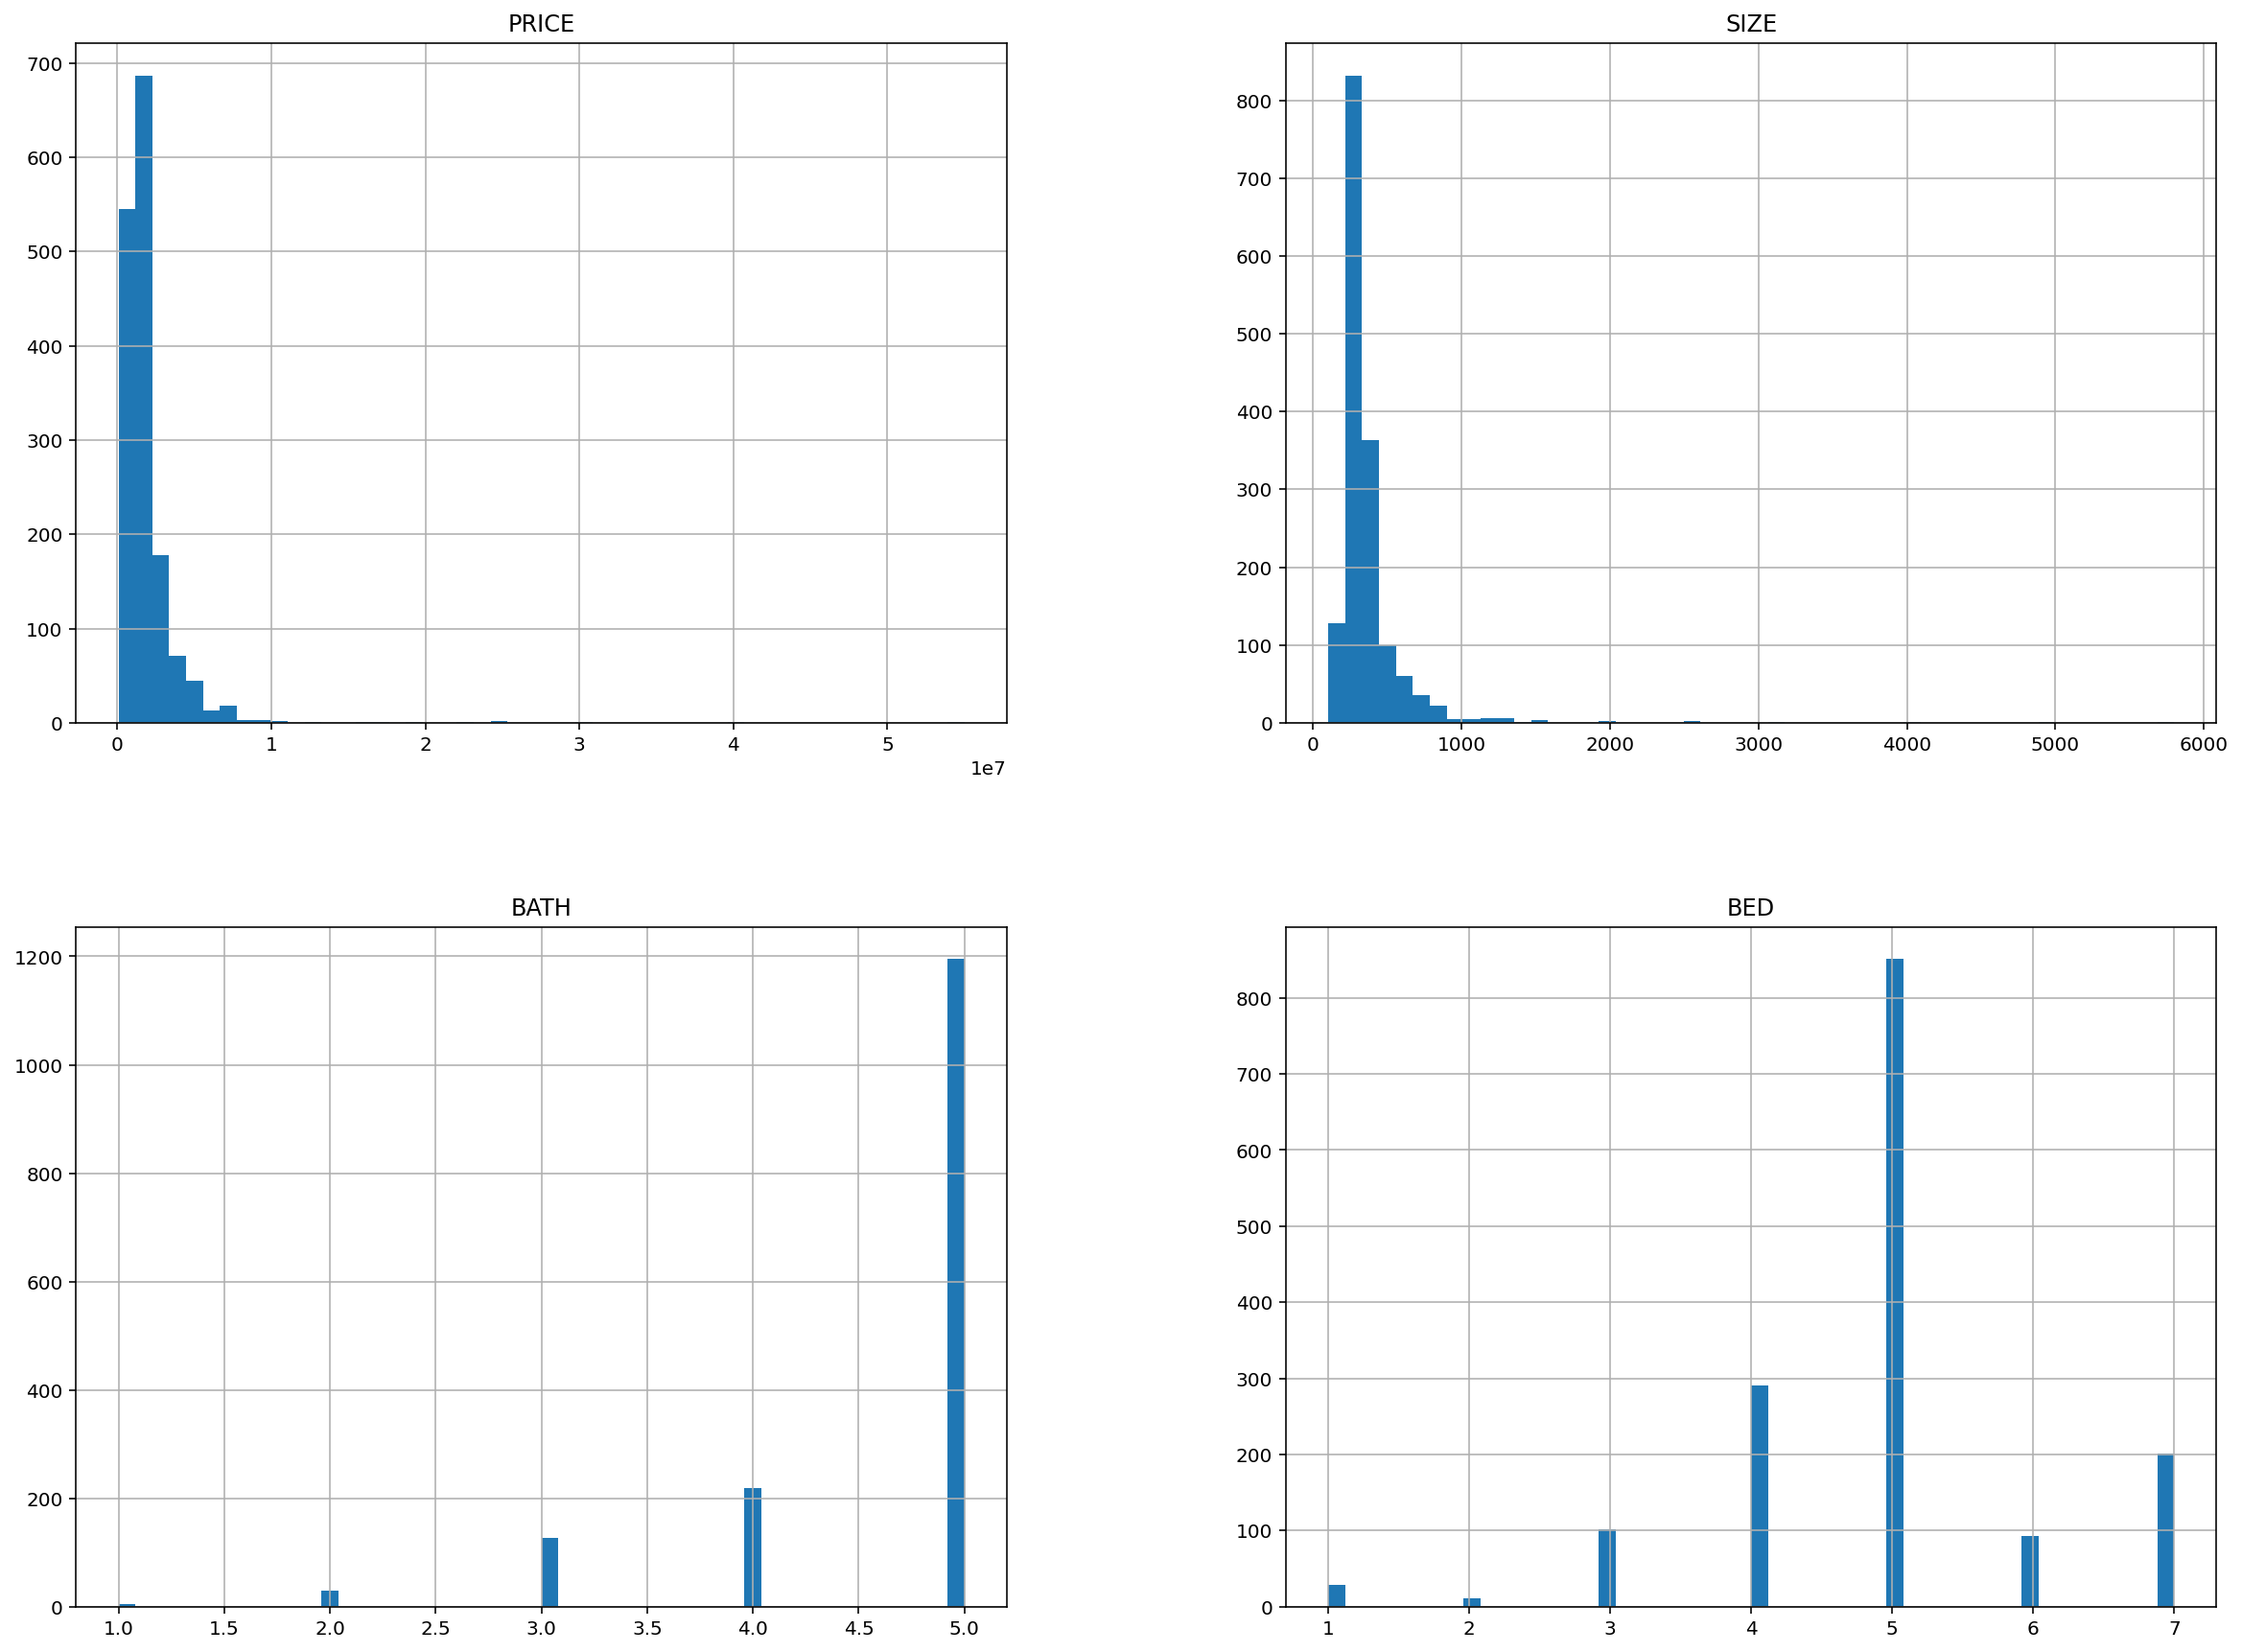

In [47]:
# Display all categoral columns as countplots(similar to histograms)
df.hist(bins=50,figsize=(20,15));

### Split into feature and target

In [48]:
#Separate our features from our target

X = df.loc[:,['LOCATION','SIZE', 'BATH', 'BED']]

y = df['PRICE']

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
# import model and fit
from sklearn.preprocessing import StandardScaler

## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

ValueError: could not convert string to float: '   حي القادسية  '

In [51]:
## Scale the Predictors on both the train and valdation set
X_tr = std.transform(X_train.values)
X_va = std.transform(X_val.values)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [52]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LOCATION  1575 non-null   object
 1   SIZE      1575 non-null   int64 
 2   BATH      1575 non-null   int64 
 3   BED       1575 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 49.3+ KB


In [53]:
X.drop("LOCATION", axis = 1, inplace = True)

## Split into train, validation and test

In [54]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

In [55]:
X_train.shape

(1134, 3)

In [56]:
X_val.shape

(126, 3)

In [57]:
X_test.shape

(315, 3)

#  Discover and visualize the data 


In [58]:
Housing_df=X_train.copy()

In [59]:
Housing_df

,SIZE,BATH,BED
1315,350,5,4
1349,240,5,4
1384,384,4,4
900,200,5,6
328,440,5,5
...,...,...,...
1434,250,5,5
577,375,5,5
406,250,5,5
935,383,5,5


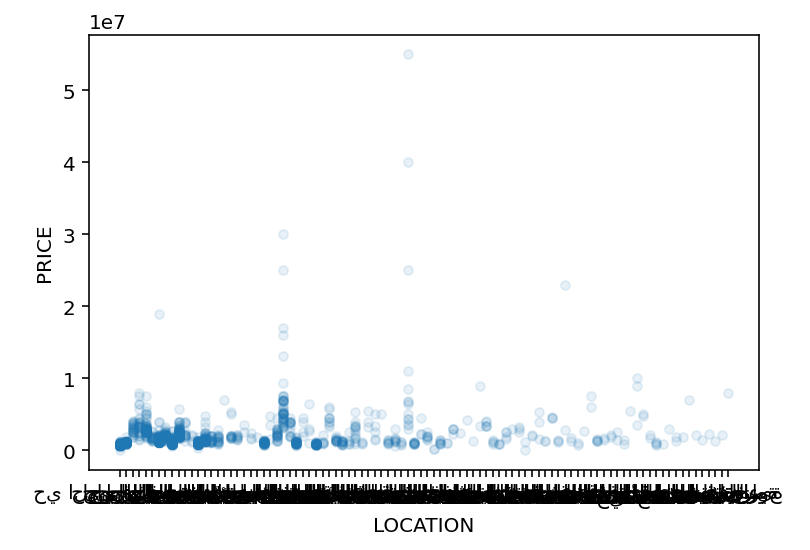

In [60]:
df.plot(kind="scatter", x="LOCATION", y="PRICE", alpha=0.1);

# Visualizing with Seaborn

In [61]:
# View the correlations
df.corr()

,PRICE,SIZE,BATH,BED
PRICE,1.000000,0.862011,0.026696,0.066084
SIZE,0.862011,1.000000,0.010901,0.074033
BATH,0.026696,0.010901,1.000000,0.337442
BED,0.066084,0.074033,0.337442,1.000000


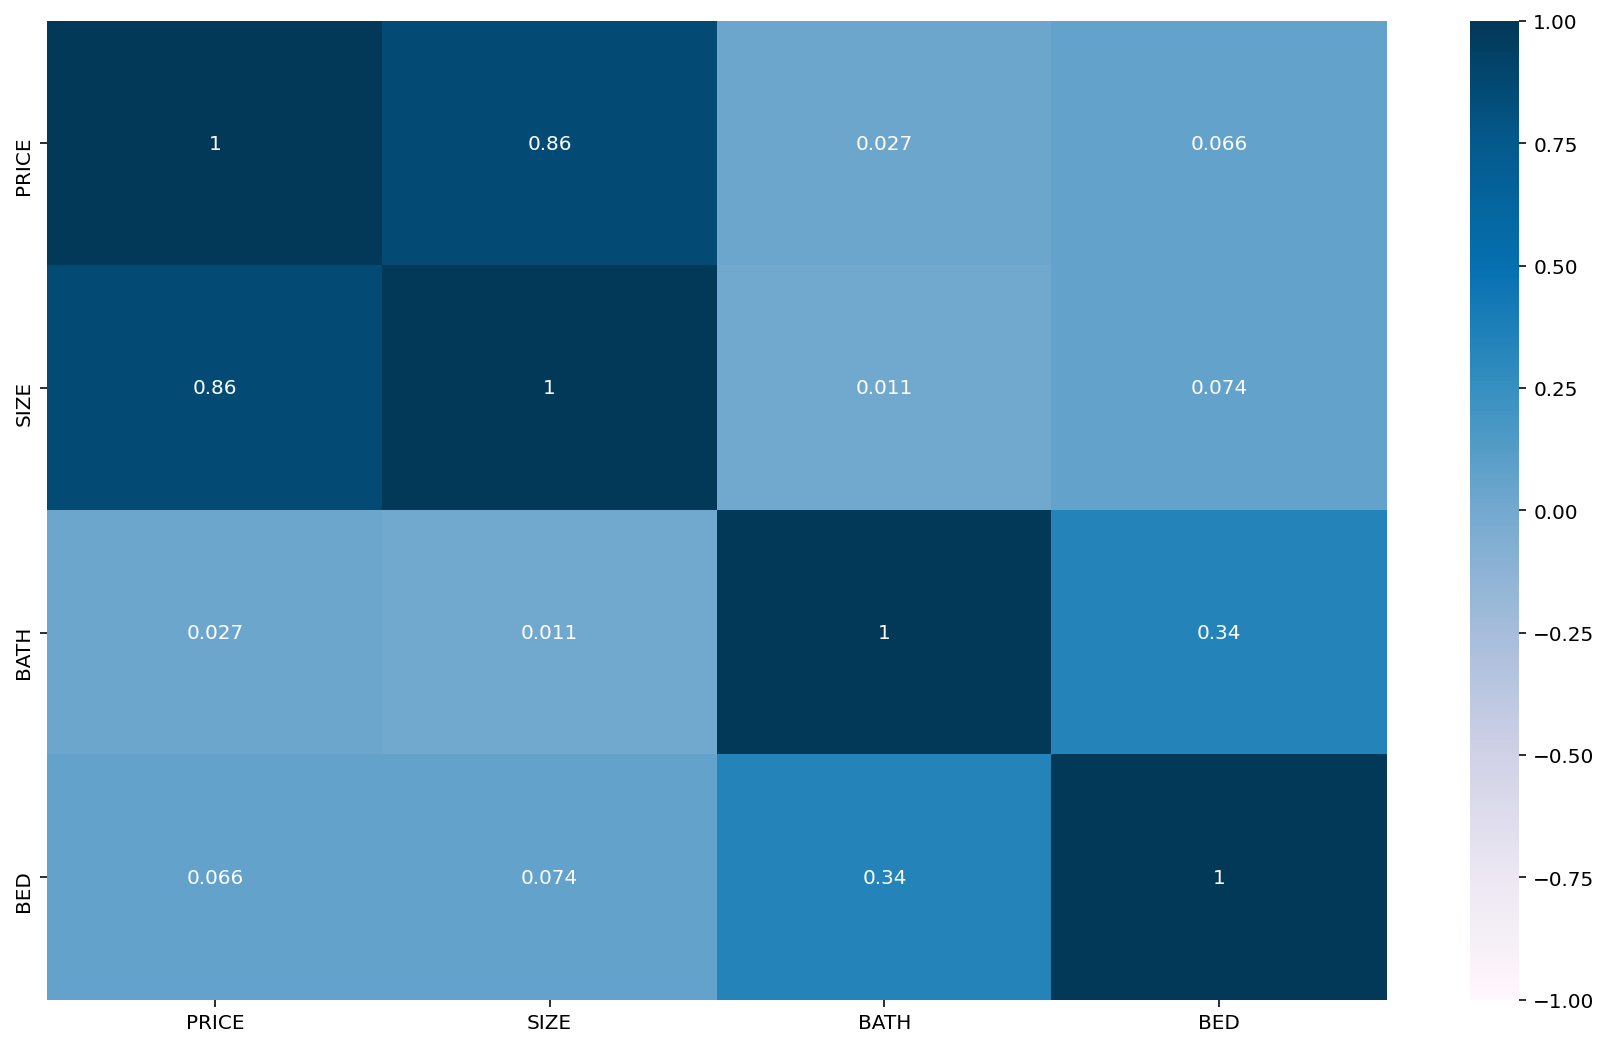

In [73]:
# example of a better corr matrix
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(), cmap="PuBu", annot=True, vmin=-1, vmax=1);

<Figure size 2160x2160 with 0 Axes>

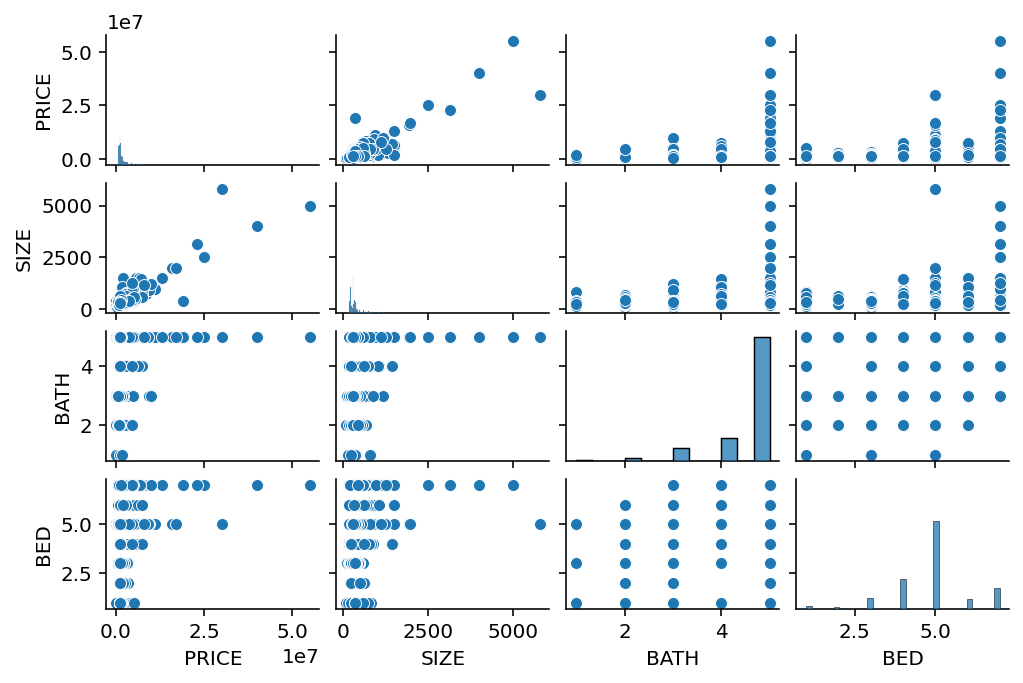

In [63]:
# Plot all of the variable-to-variable relations as scatterplots
plt.figure(figsize=(30, 30))
sns.pairplot(df, height=1.2, aspect=1.5);


# Baseline Model

In [46]:
# Create your model
lm = LinearRegression()

# Fit your model to your training set
lm.fit(X_train,y_train)


lm.score(X_train,y_train)

0.7747790545507458

In [47]:
lm.score(X_val,y_val)

0.2882714586696268

# Experiment 

1. Label Encoder  

In [48]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df["LOCATION"] = le.fit_transform(df["LOCATION"])

In [49]:
df

,LOCATION,PRICE,SIZE,BATH,BED,LINK
0,9,750000,240,5,7,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1,88,1100000,330,4,5,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
2,9,880000,230,5,5,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
3,91,3700000,428,5,6,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
4,70,7900000,870,5,7,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
...,...,...,...,...,...,...
1570,76,3700000,375,5,5,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1571,5,1400000,456,5,7,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1572,44,8000000,1144,5,5,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...
1573,72,1300000,360,5,1,https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D...


In [50]:
X1 = X.copy()

In [51]:
X1["LOCATION"] = df["LOCATION"]

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X1, y, test_size = 0.2, random_state = 42)

In [53]:
lm_1 = LinearRegression()
lm_1.fit(X_train,y_train)
lm_1.score(X_train,y_train)

0.7651587992588396

In [54]:
lm_1.score(X_val,y_val)

0.5939534044435513

2. Polynomial

In [55]:
X2 = X.copy()

In [56]:
X2

,SIZE,BATH,BED
0,240,5,7
1,330,4,5
2,230,5,5
3,428,5,6
4,870,5,7
...,...,...,...
1570,375,5,5
1571,456,5,7
1572,1144,5,5
1573,360,5,1


In [57]:
#adding polynomial terms
X2["SIZE_2"] = X2['SIZE'] ** 2
X2["LOCATION_2"] = X1['LOCATION'] ** 2

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X2, y, test_size = 0.2, random_state = 42)

In [59]:
X_val.shape

(315, 5)

In [60]:
y_val.shape

(315,)

In [61]:
lm_1 = LinearRegression()
lm_1.fit(X_train,y_train)
lm_1.score(X_train,y_train)

0.8255597896871572

In [62]:
lm_1.score(X_val,y_val)

-0.09339392847076322

3. Feature enginering " Adding intreaction terms "

In [63]:
X3 = X.copy()

In [64]:
X3

,SIZE,BATH,BED
0,240,5,7
1,330,4,5
2,230,5,5
3,428,5,6
4,870,5,7
...,...,...,...
1570,375,5,5
1571,456,5,7
1572,1144,5,5
1573,360,5,1


In [65]:
# multiplicative interaction
X3["LOCATIONxSIZE"] = X1['LOCATION'] * X3['SIZE']

# division interaction
X3["LOCATION/BED"] = X1['LOCATION'] / X3['BED']

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X3, y, test_size = 0.2, random_state = 42)

In [67]:
lm_1 = LinearRegression()
lm_1.fit(X_train,y_train)
lm_1.score(X_train,y_train)

0.7763914554900057

In [68]:
lm_1.score(X_val,y_val)

0.6429060971161897

# LASSO

In [69]:
X_train

,SIZE,BATH,BED,LOCATIONxSIZE,LOCATION/BED
1043,360,5,5,13680,7.600000
277,560,5,4,21280,9.500000
1225,220,5,5,12540,11.400000
1188,325,5,6,19500,10.000000
1554,240,5,7,2160,1.285714
...,...,...,...,...,...
1130,370,5,7,9990,3.857143
1294,390,5,5,31590,16.200000
860,312,5,5,4056,2.600000
1459,379,4,5,23877,12.600000


In [70]:
lasso_model = Lasso(alpha = 0.02)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.02)

In [71]:
list(zip(X_train.columns, lasso_model.coef_))

[('SIZE', 6563.16227428432),
 ('BATH', 54077.22914222968),
 ('BED', -142438.10797010432),
 ('LOCATIONxSIZE', 29.65513268607663),
 ('LOCATION/BED', -31130.84185499098)]

In [72]:
lasso_model.score(X_train,y_train)

0.7763914554900053

In [73]:
lasso_model.score(X_val,y_val)

0.6429060965596155

### Ridge

In [74]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [75]:
X_tr=std.transform(X_train.values)
X_val_std=std.transform(X_val.values)

In [76]:
lr_model_ridge = Ridge(alpha = 200)
lr_model_ridge.fit(X_tr, y_train)

Ridge(alpha=200)

In [77]:
lr_model_ridge.score(X_tr,y_train)

0.7670120042093629

In [78]:
lr_model_ridge.score(X_val_std,y_val)

0.7255877358144549

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
ridge_params = {'alpha':[130, 132, 135, 129, 127]}

In [81]:
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params).fit(X_tr, y_train)

In [82]:
ridge_grid.best_estimator_

Ridge(alpha=127)

In [83]:
ridge_grid.best_score_

0.7008436933741595